In [145]:
using PyPlot
using JuMP, Ipopt

In [164]:
include("../src/model.jl");
include("../src/diagnostics.jl");
include("../src/optimization.jl");
include("../src/plotting.jl");
include("../src/defaults.jl");

include("../src/stochastic_emissions.jl");

In [165]:
model = ClimateModel();

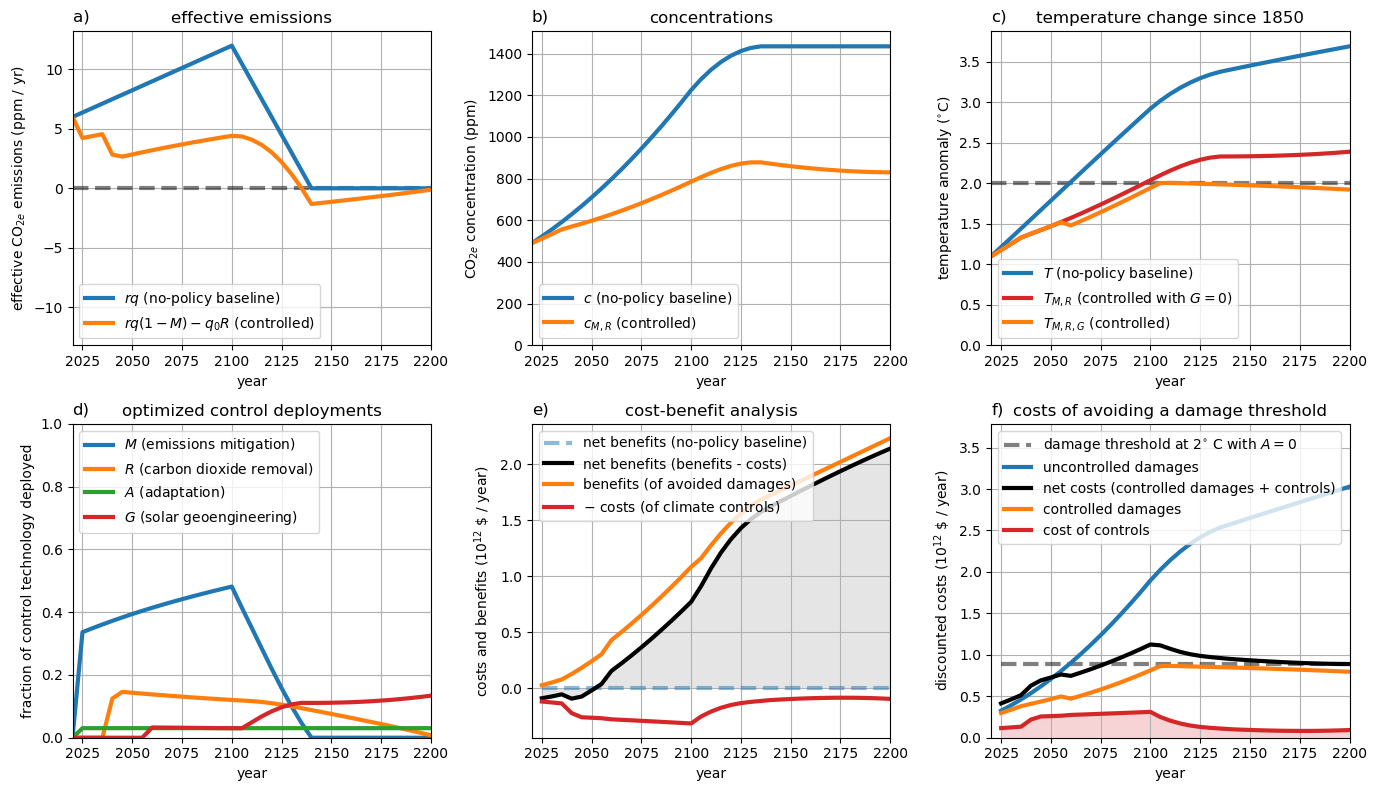

In [166]:
ensemble = Dict()
optimize_controls!(model);
ensemble[model.name] = model;
plot_state(model);
savefig("../figures/policy-update-$(Int(model.present_year)).png", bbox_inches="tight", dpi=100)

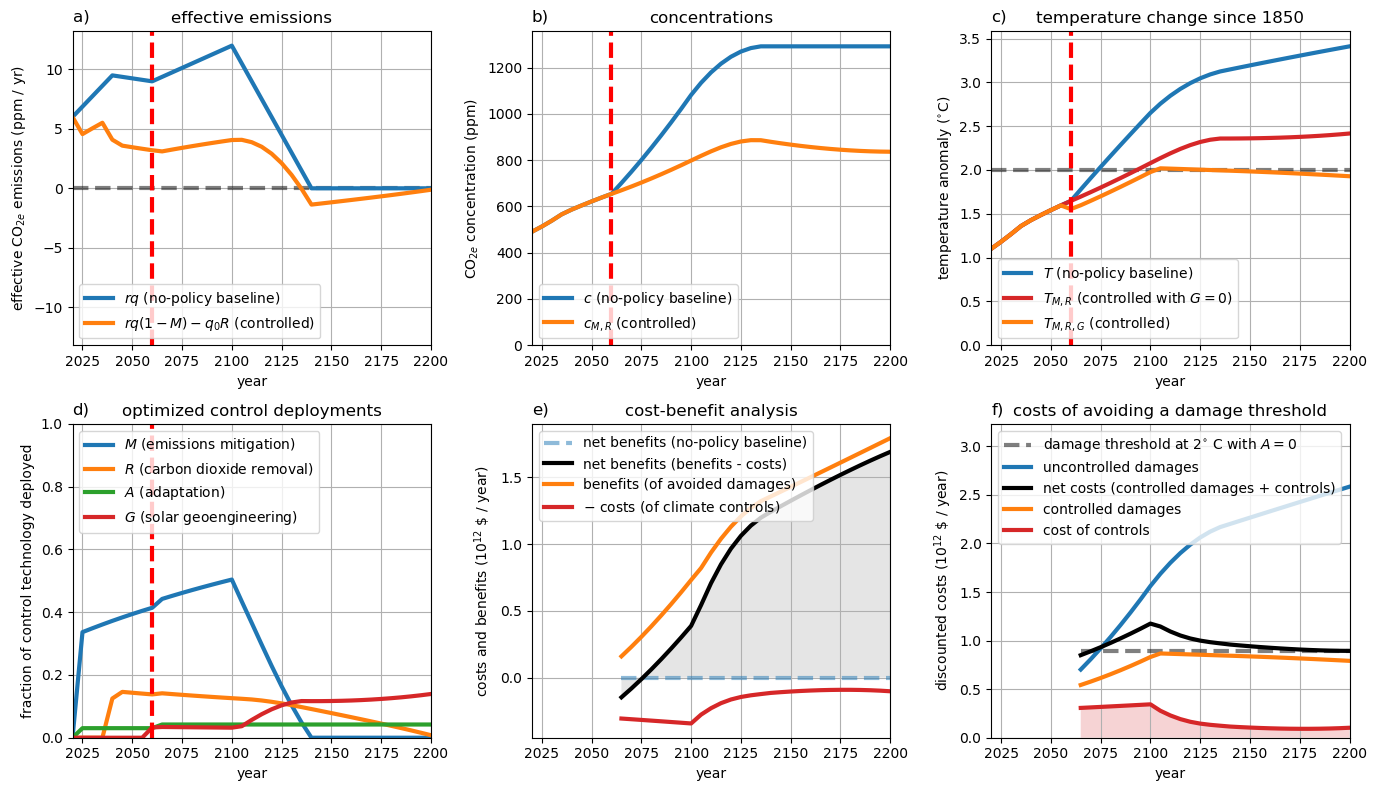

In [167]:
model = add_emissions_bump(model, 40., 5.)
optimize_controls!(model);
plot_state(model)
ensemble[model.name] = model;
savefig("../figures/policy-update-$(Int(model.present_year)).png", bbox_inches="tight", dpi=100)

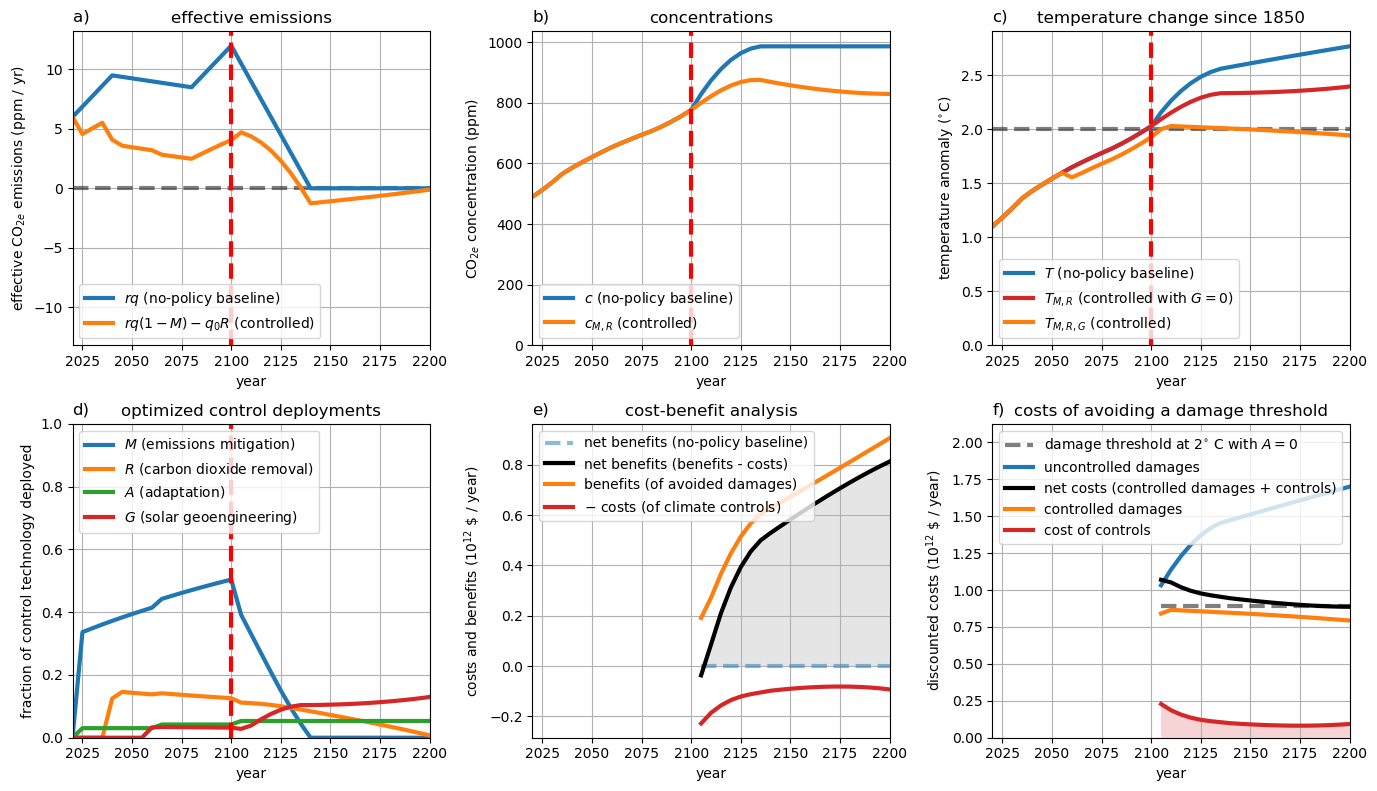

In [168]:
model = add_emissions_bump(model, 40., -5.)
optimize_controls!(model);
plot_state(model)
ensemble[model.name] = model;
savefig("../figures/policy-update-$(Int(model.present_year)).png", bbox_inches="tight", dpi=100)